In [2]:
import pandas as pd
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timezone



In [3]:
df = pd.read_pickle("/Users/nicolasroever/Dropbox/Promotion/Bargaining/bargaining_experiment/bargain_live/randomization_values/participant_data_4_groups_one-sided.pkl")

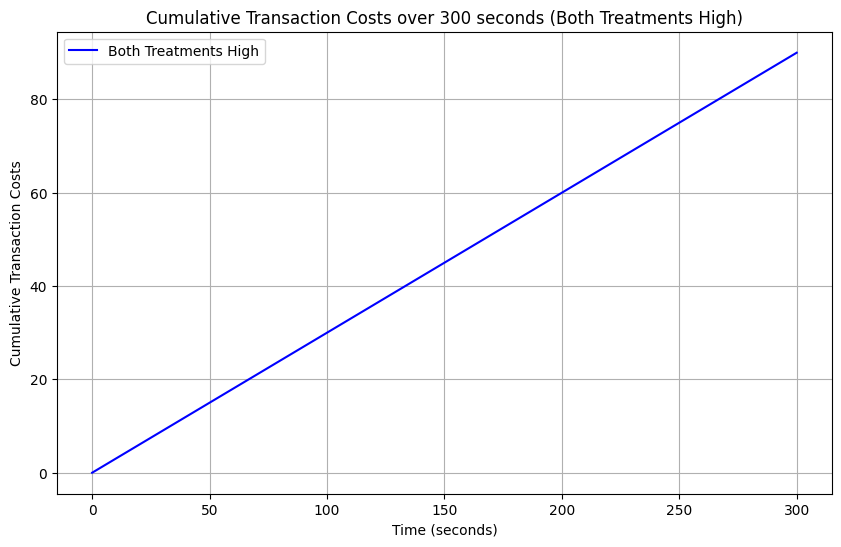

In [7]:
cumulative_costs, _ = calculate_transaction_costs(
    TA_treatment_high=True, 
    total_bargaining_time=300
)

# Plot cumulative transaction costs
plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_costs)), cumulative_costs, label="Both Treatments High", color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Transaction Costs')
plt.title('Cumulative Transaction Costs over 300 seconds (Both Treatments High)')
plt.legend()
plt.grid(True)
plt.show()

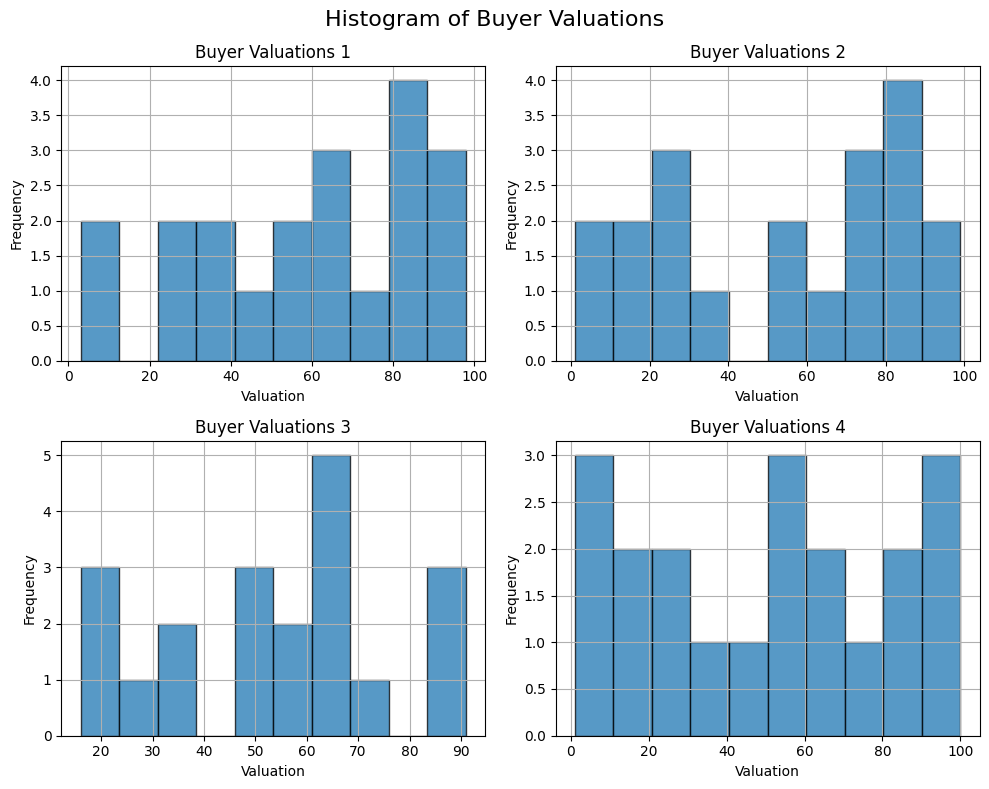

In [ ]:
# Create a plot grid for histograms
# Store the valuation vectors in a list
buyer_valuations = [
    buyer_valuations_1,
    buyer_valuations_2,
    buyer_valuations_3,
    buyer_valuations_4
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Histogram of Buyer Valuations', fontsize=16)

# Plot histograms for each buyer valuation vector
for i, ax in enumerate(axes.flat, start=1):
    ax.hist(buyer_valuations[i-1], bins=10, alpha=0.75, edgecolor='black')
    ax.set_title(f'Buyer Valuations {i}')
    ax.set_xlabel('Valuation')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


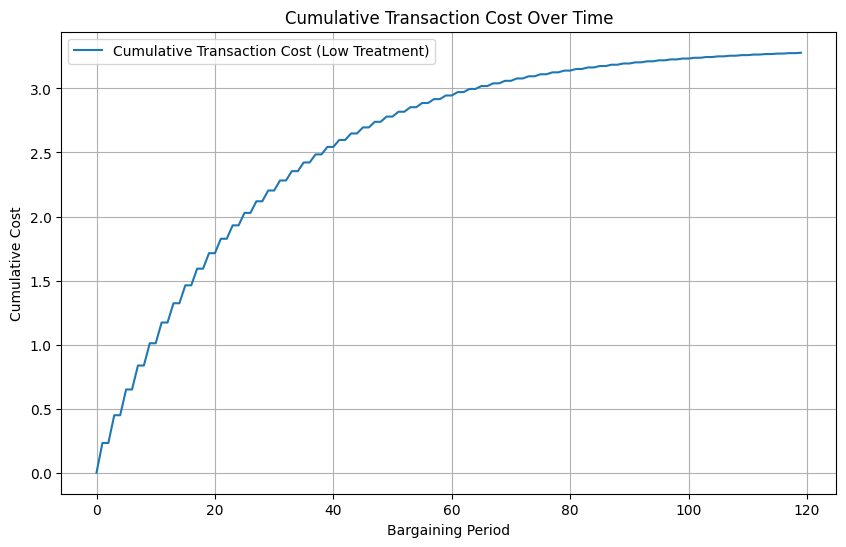

In [4]:
# Calculate the transaction costs for 120 seconds
total_bargaining_time = 120
cumulative_cost, _ = calculate_transaction_costs(TA_treatment_high=False, total_bargaining_time=total_bargaining_time)

# Plot the cumulative cost over time
plt.figure(figsize=(10, 6))
plt.plot(range(total_bargaining_time), cumulative_cost, label='Cumulative Transaction Cost (Low Treatment)')
plt.xlabel('Bargaining Period')
plt.ylabel('Cumulative Cost')
plt.title('Cumulative Transaction Cost Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
start_time= datetime.now(tz=timezone.utc)

In [5]:
seconds_elapsed = (datetime.now(tz=timezone.utc) - start_time).total_seconds()
print(seconds_elapsed)

17.456419


In [6]:
type(seconds_elapsed)

float